# **GRÁFICAS AVANZADAS**

In [1]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## **Nube de palabras**



Una nube de palabras muestra una lista de palabras, donde la importancia de cada una se representa con el tamaño o color de fuente de la palabra. Es útil para mostrar rápidamente los términos más destacados de un texto. Una de sus desventajas es que palabras largas serán más visibles, pese a que puedan ser menos relevantes.

La librería **WordCloud** permite generar nubes de palabras de manera sencilla.

Para ello se necesita crear una instancia estableciendo algunos parámetros:
* 'max_font_size', 'min_font_size'
* 'max_word'
* 'background_color'
* 'colormap'

Después se aplica el método '.generate()' introduciendo como argumento una cadena de strings. Finalmente se puede visualizar la gráfica usando el método de matplotlib 'plt.imshow()'

In [2]:
# !pip install WordCloud

In [3]:
# Libraries
from wordcloud import WordCloud

In [4]:
# Create a list of word
text = "Visualización datos herramienta fundamental análisis interpretación información Consiste representar datos manera gráfica facilita identificación patrones tendencias relaciones pueden pasar desapercibidas forma números texto Utilizando gráficos diagramas representaciones visuales visualización datos permite comunicar manera efectiva ideas complejas resumir grandes cantidades información manera clara concisa Además técnica útil diversas áreas ciencia datos investigación académica marketing medicina interpretación datos esencial toma decisiones informadas"

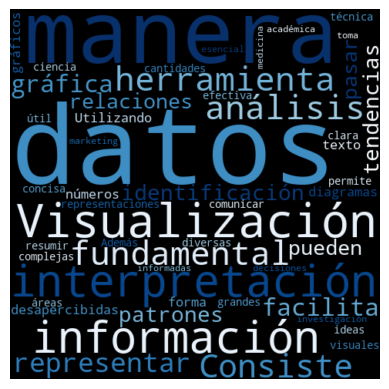

In [5]:
# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0,
                      background_color="black", colormap='Blues')
wordcloud_plot = wordcloud.generate(text)

# Display the generated image:
plt.imshow(wordcloud_plot, interpolation='bilinear')
plt.axis("off")
plt.show()

## **Treemap**



Es una gráfica que muestra datos jerarquizados mediante rectángulos anidados. Cada grupo de observaciones es representado por un rectángulo, cuya área es proporcional a su valor.

Una forma de crear esta gráfica es recurriendo a la librería [**squarify**](https://github.com/laserson/squarify) la cual automáticamente construye los rectángulos del Treemap. Su desventaja es que debe asignarse directamente las etiquetas y colores deseados.

In [6]:
# !pip install squarify

In [7]:
import squarify

In [8]:
# Create dataframe
population = [1417, 1412, 333, 275, 235, 218, 215, 171, 144, 127, 125, 123, 115, 110]
country = ['India', 'China', 'EU', 'Indonesia', 'Pakistán', 'Nigeria', 'Brasil', 'Bangladesh', 'Rusia', 'México', 'Japón', 'Etiopía', 'Filipinas', 'Egipto']
continent = ['Asia', 'Asia', 'América', 'Asia', 'Asia', 'África', 'América', 'Asia', 'Europa', 'América', 'Asia', 'África', 'Asia', 'África']
df = pd.DataFrame({'population': population,
                   'country': country,
                   'continent': continent})


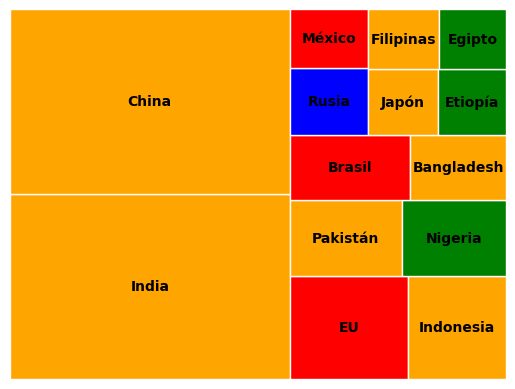

In [9]:
# Plot Treemap
color = {'Asia': 'orange',
         'Europa': 'blue',
         'África': 'green',
         'América': 'red'}
color_by_country = [color[i] for i in df["continent"]]
squarify.plot(sizes = df['population'],
              color=color_by_country,
              label=df["country"],
              edgecolor='white',
              text_kwargs={'fontsize':10, 'color':'black', 'weight':'bold'})
plt.axis('off')
plt.show()

## **Dendograma**

Un dendograma es una gráfica que muestra una agrupación jerárquica de los datos a partir de una medida de distancia.

Para generar este tipo de gráficas se pueden utilizar las funciones ['dendogram'](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) (para la gráfica) y ['linkage'](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) (para calcular las distancias) de la librería **scipy** especializada en cómputo científico.

Un detalle es que la función 'linkage' requiere una estructura específica, un vector n-dimensional, donde cada fila corresponde a un arreglo 1-dimensional.

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [11]:
X = np.array(df["population"]).reshape(-1, 1)
print(X)

[[1417]
 [1412]
 [ 333]
 [ 275]
 [ 235]
 [ 218]
 [ 215]
 [ 171]
 [ 144]
 [ 127]
 [ 125]
 [ 123]
 [ 115]
 [ 110]]


In [12]:
# Calculate the distance between each sample
Z = linkage(X, 'average')

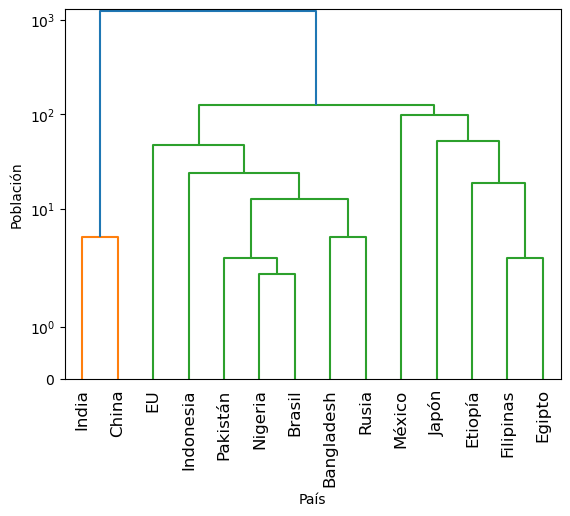

In [13]:
fig, ax = plt.subplots()
dn = dendrogram(Z)
ax.set_ylabel("Población")
ax.set_xlabel("País")
ax.set_yscale("symlog")
ax.set_xticklabels(df["country"], rotation=90)
plt.show()

## **Diagrama de Sankey**

Es una técnica de visualización que permite msotrar flujos. En este caso, varias entidades o nodos se representan mediante rectángulos o textos; mientras que sus vínculos son representados mediante arcos que tienen un ancho proporcional a la importancia del flujo.

Estos gráficos se pueden utilizar a mediante la librería *pySankey* que se basa en Matplotlib.

In [14]:
#!pip install pySankey

In [15]:
from pySankey.sankey import sankey

In [16]:
options = ["A", "B", "C", "D", "E"]
colors = {
    "A": "#f71b1b",
    "B": "#1b7ef7",
    "C": "#f3f71b",
    "D": "#12e23f",
    "E": "#f78c1b"
}

df = pd.DataFrame({'Source': np.random.choice(options, 200),
                   'Target': np.random.choice(options+["F"], 200),
                   'Value': np.random.exponential(scale=50, size=200).astype(int)})
df.head()

,Source,Target,Value
0,E,B,75
1,C,C,49
2,C,F,119
3,B,E,38
4,B,F,7


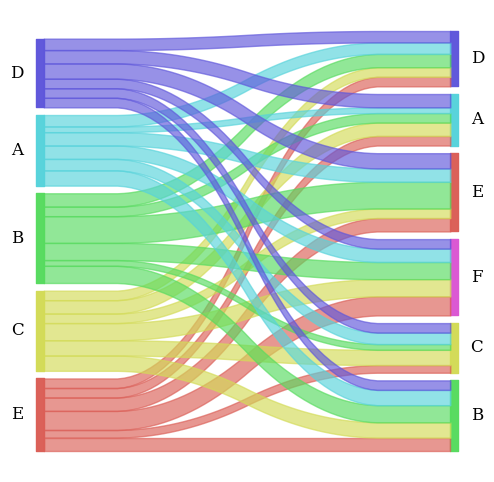

In [17]:
sankey( left=df['Source'], right=df['Target'], 
       aspect=20, fontsize=12)